<a href="https://colab.research.google.com/github/Mini-project4ppl/Mini_Project/blob/master/CLAHEvsAHE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

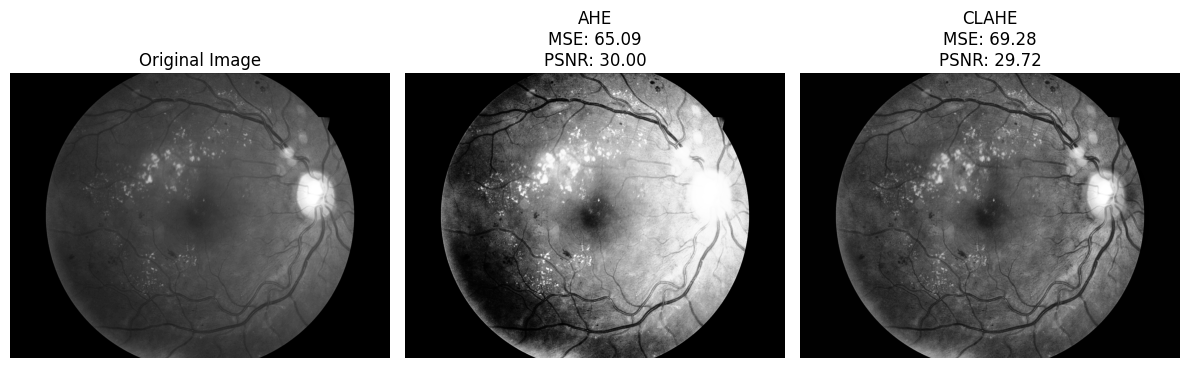

In [ ]:
# Load the original image
original_img = cv2.imread('/content/drive/MyDrive/5925_right.jpeg', cv2.IMREAD_GRAYSCALE)

#  Apply Adaptive Histogram Equalization (AHE)
ahe_img = cv2.equalizeHist(original_img)

# Apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(original_img)

# Compute Mean Squared Error (MSE)
mse_ahe = np.mean((original_img - ahe_img)**2)
mse_clahe = np.mean((original_img - clahe_img)**2)

# Compute Peak Signal-to-Noise Ratio (PSNR)
max_pixel_value = 255
psnr_ahe = 10 * np.log10((max_pixel_value**2) / mse_ahe)
psnr_clahe = 10 * np.log10((max_pixel_value**2) / mse_clahe)

# Plotting the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].imshow(original_img, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(ahe_img, cmap='gray')
axes[1].set_title(f'AHE\nMSE: {mse_ahe:.2f}\nPSNR: {psnr_ahe:.2f}')

axes[2].imshow(clahe_img, cmap='gray')
axes[2].set_title(f'CLAHE\nMSE: {mse_clahe:.2f}\nPSNR: {psnr_clahe:.2f}')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Metric Value using Correlation Hist Comp Method -0.015240705802384959
Metric Value using Chi Square Hist Comp Method 211.14543399246023
Metric Value using Intersection Hist Comp Method 0.5109228582296055
Metric Value using Bhattacharyya Hist Comp Method 0.8348353730151009




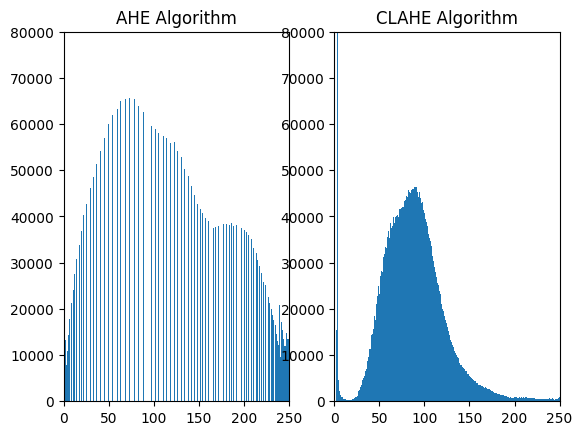

In [ ]:
img1=ahe_img
img2=clahe_img

# Calculate the histograms, and normalize them
#hist_img1 = cv2.calcHist([img1], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
#hist_img2 = cv2.calcHist([img2], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])

hist_img1=cv2.calcHist([img1],[0],None,[256],[0,256])
hist_img2=cv2.calcHist([img2],[0],None,[256],[0,256])

cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

# Find the metric value
metric_val1 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)
metric_val2 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
metric_val3 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
metric_val4 = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_BHATTACHARYYA)
print("Metric Value using Correlation Hist Comp Method", metric_val1)
print("Metric Value using Chi Square Hist Comp Method", metric_val2)
print("Metric Value using Intersection Hist Comp Method", metric_val3)
print("Metric Value using Bhattacharyya Hist Comp Method", metric_val4)

print("\n")

# plot the histograms of two images
plt.subplot(121), plt.hist(img1.ravel(),256,[0,256]),
plt.title('AHE Algorithm')
plt.xlim(0,250)
plt.ylim(0,80000)

plt.subplot(122), plt.hist(img2.ravel(),256,[0,256]),
plt.title('CLAHE Algorithm')
plt.xlim(0,250)
plt.ylim(0,80000)
plt.show()